In [1]:
from lang_sam import LangSAM
import argparse

import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import os

#os.environ["CUDA_VISIBLE_DEVICES"]=""

model = LangSAM()
image_pil = Image.open("sample_input_images/chair.jpg")
masks, boxes, phrases, logits = model.predict(image_pil.convert("RGB"), "chair")
masks=masks.numpy()[0].astype(np.int8)


/home/psrahul/anaconda3/envs/ode-gpu/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/mnt/files/Repositories/object-pose-editor/groundingdino/models/GroundingDINO/ms_deform_attn.py:31: UserWarning: Failed to load custom C++ ops. Running on CPU mode Only!
  warnings.warn("Failed to load custom C++ ops. Running on CPU mode Only!")
/home/psrahul/anaconda3/envs/ode-gpu/lib/python3.10/site-packages/torch/functional.py:507: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3549.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


final text_encoder_type: bert-base-uncased
Model loaded from /home/psrahul/.cache/huggingface/hub/models--ShilongLiu--GroundingDINO/snapshots/a94c9b567a2a374598f05c584e96798a170c56fb/groundingdino_swinb_cogcoor.pth 
 => _IncompatibleKeys(missing_keys=[], unexpected_keys=['label_enc.weight', 'bert.embeddings.position_ids'])


/home/psrahul/anaconda3/envs/ode-gpu/lib/python3.10/site-packages/transformers/modeling_utils.py:962: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(
/home/psrahul/anaconda3/envs/ode-gpu/lib/python3.10/site-packages/torch/utils/checkpoint.py:460: UserWarning: torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be updated to be False in the future. To maintain current behavior, pass use_reentrant=True. It is recommended that you use use_reentrant=False. Refer to docs for more details on the differences between the two variants.
  warnings.warn(
/home/psrahul/anaconda3/envs/ode-gpu/lib/python3.10/site-packages/torch/utils/checkpoint.py:90: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn(


In [2]:
np.unique(masks)

array([0, 1], dtype=int8)

In [3]:
mask_pil=Image.fromarray(masks*255)

/home/psrahul/anaconda3/envs/ode-gpu/lib/python3.10/site-packages/diffusers/utils/outputs.py:63: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(
100%|██████████| 50/50 [00:06<00:00,  8.26it/s]


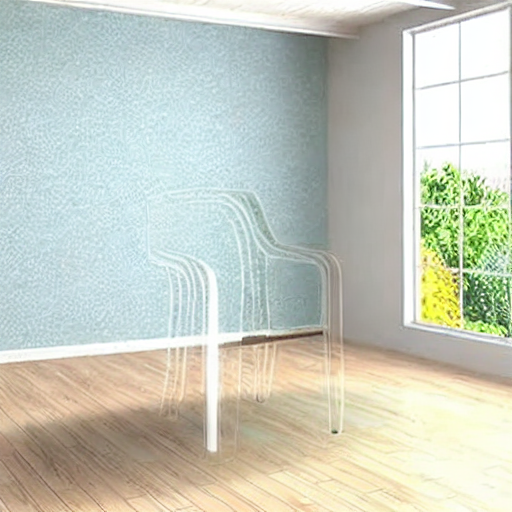

In [4]:
import torch
from diffusers import AutoPipelineForInpainting,AutoPipelineForImage2Image
from diffusers.utils import load_image, make_image_grid
import numpy as  np

pipeline = AutoPipelineForInpainting.from_pretrained(
    "runwayml/stable-diffusion-inpainting", torch_dtype=torch.float16, variant="fp16"
)
pipeline = pipeline.to("cuda")


generator = torch.Generator("cuda")#.manual_seed(42)
init_image = load_image("sample_input_images/chair.jpg")
#mask_image = load_image("task1_output_images/chair_mask.jpg")
mask_image=mask_pil
prompt = "background"
init_image =pipeline(prompt=prompt, image=init_image, mask_image=mask_image, generator=generator).images[0]
init_image